In [20]:

#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.target import FeatureCorrelation
from sklearn.linear_model import LinearRegression


The following notebook looks at the Boston Housing Data.
The goal is to find a simple multiple linear regression model that predicts housing prices from a lean set of columns.

In [21]:

from sklearn import datasets
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['PRICE'] = pd.Series(boston_data.target)
df_boston.head()
print(df_boston.shape)

(506, 14)


Note:  there is a warning about the data set and ethical issues.
This is noted and respected

First, we like to get a feel for the distribution of the housing prices.
Are they highly skewed to one side or another - are there extreme outliers?
In this case, the data looks pretty normally distributed with a slight high outlier at the upper end.
This is not entirely uncommon for real estate type data, where there is no "upper" end to housing prices.
Seeing very large values as outliers is not necessarily unusual.

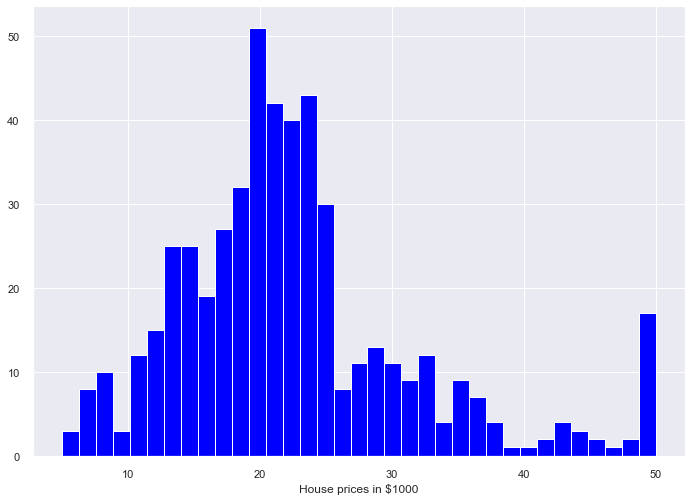

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df_boston['PRICE'],color ="blue", bins=35)
plt.xlabel("House prices in $1000")
plt.show()


Now that we have loaded the Boston housing data - we want to see how the individual features are correlated with the median housing price.
The goal here is to get a sense of which features are really important, and which we can possible consider dropping.  
Run a correlatation matrix with all features (Which is a bit large) and we can see quickly what are the main features.
Additionally, this will let us see what features are correlated with other, which will help us see if there are any interactions between features.
If we see interactions between two features clearly, we can consider dropping one since it won't add much to the model, and even cause difficulties.

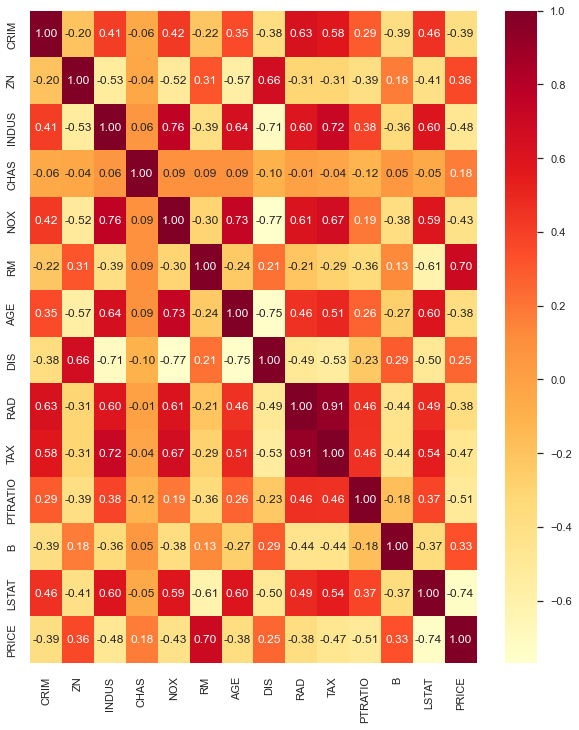

In [23]:
fig, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(df_boston.corr(), cmap='YlOrRd', annot=True, fmt=".2f")
plt.show()

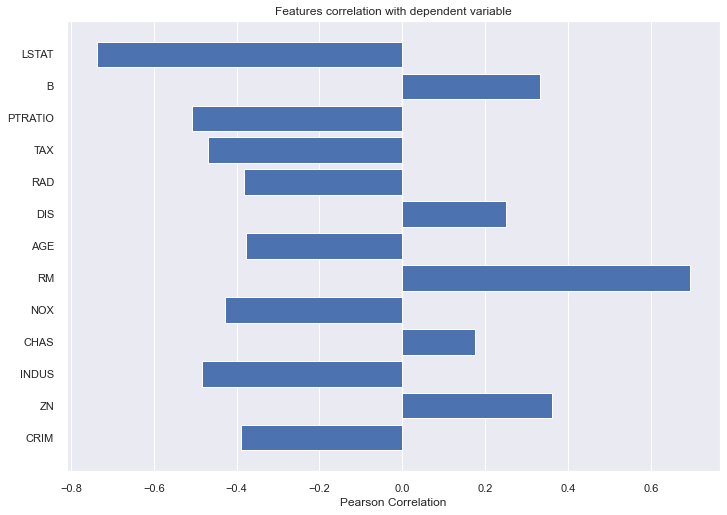

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [24]:
features = df_boston.drop('PRICE', axis=1)
target = df_boston['PRICE']
features.shape, target.shape

from yellowbrick.target import FeatureCorrelation
vis = FeatureCorrelation(lables = features.columns)
vis.fit(features, target)
vis.poof()

From the heat map, we can pick somewhat arbitrarily the features that correlate over 0.5 in magnitude.
This gives us RM, PTRATIO, LSTAT as over 0.5

INDUS was just slightly below at -0.48 and we probably would have put this in as well.  However, since LSTAT and INDUS had some multicolinearity at 0.6 - we ultimately decided to drop INDUS guessing it might cause more harm than good.  We could be wrong on this.

Our goal here is to create a very lean model, so we are keeping this very small and seeing how a smaller model will perform.


Next, we look at the correlated features and how they relate to the price, and to one another.
In this case, we see that LSTAT and RM have a noticable correlation with the housing prices.
PTRATIO does not seem to show that strong a correlation, but this is not surprising as it was onl -0.51 correlation coefficient

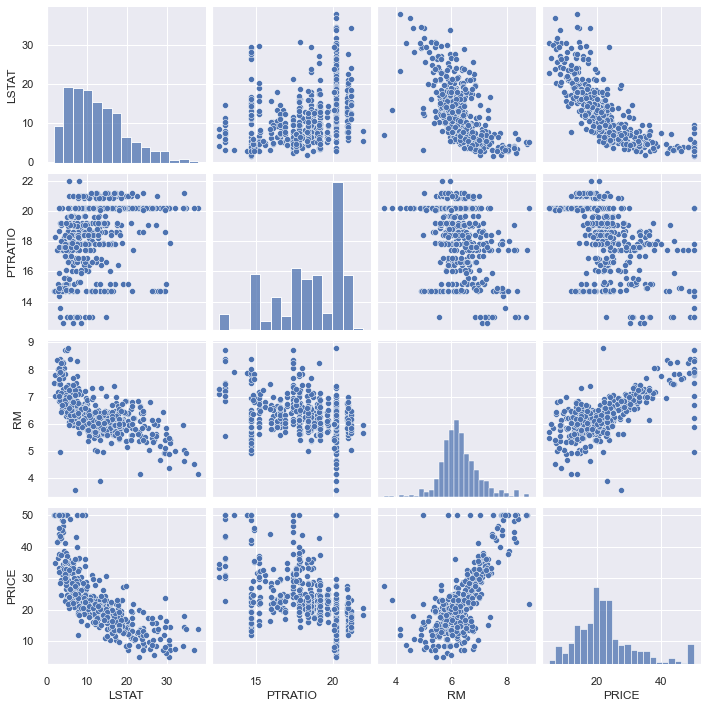

In [25]:

df_boston_lean = df_boston[['LSTAT', 'PTRATIO', 'RM', 'PRICE']]
sns.pairplot(df_boston_lean)

When looking at the individual features, we noticed the LSTAT and PTRATIO look a little skewed, so we want to do a quick log transformation and see if that normalizes the data a bit.  Otherwise, the data has more of a log fit, which is a nonlinear regression problem.  At this point, we would like to keep the data in a linear fit.

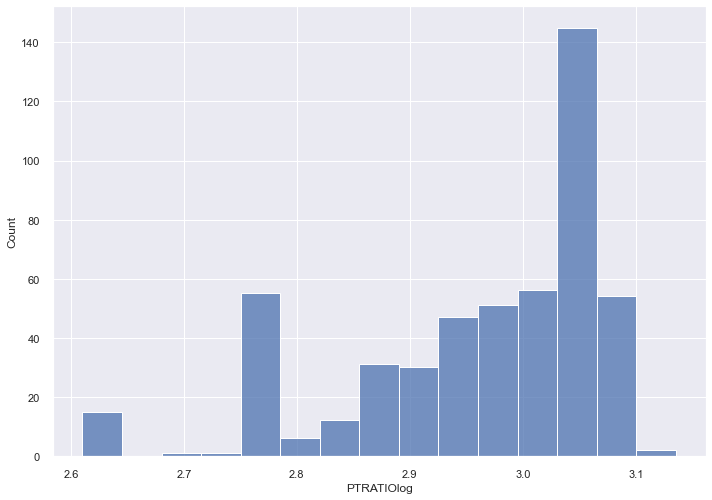

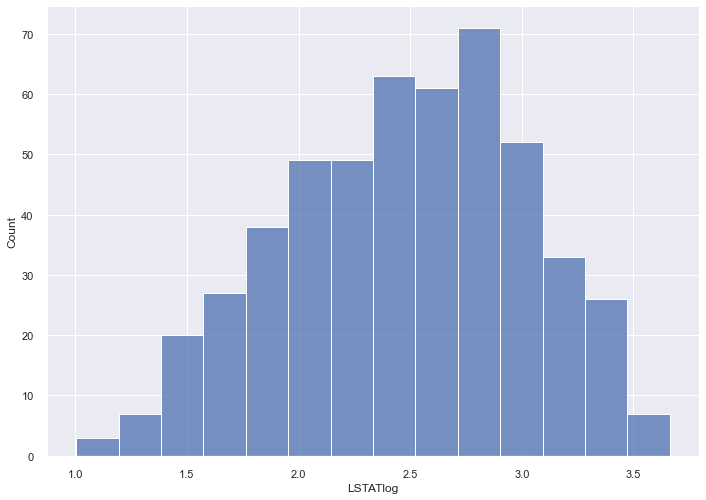

In [26]:
X=df_boston_lean.iloc[:,:-1] 
y=df_boston_lean["PRICE"]

columns_to_transform = ['PTRATIO', 'LSTAT']
for col in columns_to_transform:
    X[col + 'log'] = np.log1p(X[col])
    sns.histplot(X[col + 'log'])
    plt.show()

Xlog = X[['LSTATlog', 'PTRATIOlog', 'RM']]
X = X[['LSTAT', 'PTRATIO', 'RM']]

The LSTAT and PTRATIO columns look "more" normalized.  Especially the LSTAT column.

Now, we want to transform the data now to standard 0,1 data sets.  This is done to avoid one feature over dominating the other features with data that has a much larger scale.  By scaling all data as standard data with 0 mean and standard deviation of 1, they all equally contribute.

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:


model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6959056368091425